<a href="https://colab.research.google.com/github/nikki14182/Practice_Projects/blob/main/foodwheel_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Board Slides for FoodWheel
***

![food_image.jpg](attachment:food_image.jpg)

FoodWheel is a startup delivery service that takes away the struggle of deciding where to eat! FoodWheel picks you an amazing local restaurant and lets you order through the app. Senior leadership is getting ready for a big board meeting, and as the resident Data Analyst, you have been enlisted to help decipher data and create a presentation to answer several key questions:

What cuisines does FoodWheel offer? Which areas should the company search for more restaurants to partner with?
How has the average order amount changed over time? What does this say about the trajectory of the company?
How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?

Over this project, you will analyze several DataFrames and create several visualizations to help answer these questions.

## Project Requirements

1. Before we begin analyzing our data, we need to import two Python packages. To be able to load in and inspect our datasets, we must first import the pandas package. We will also need to create visualizations to help us analyze the data. This requires us to import pyplot, a subset of the Matplotlib package.

    **Hint:**
  ```py
import pandas as pd
```
```py
import matplotlib.pyplot as plt
```  

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cuisine Offerings

2. Now that we have imported the pandas package, we can begin looking at our data. Load and inspect the restaurant data from `restaurants.csv` into a DataFrame called `restaurants`.

    **Hint:**

    Inspect the elements of your dataset using `.head()`.

In [6]:
# loading restaurants.csv and orders.csv into dataframe

from google.colab import files
uploaded = files.upload()

Saving restaurants.csv to restaurants.csv
Saving orders.csv to orders.csv


In [8]:
# showing first 5 rows of restaurant dataframe

restaurants = pd.read_csv("restaurants.csv")
restaurants.head()

,id,name,neighborhood,cuisine
0,1,Jongro BBQ,Midtown,Korean
1,2,Pocha 32,Midtown,Korean
2,3,Nom Wah Tea Parlor,Chinatown,Chinese
3,4,Roberta’s,Brooklyn,Pizza
4,5,Speedy Romeo,Brooklyn,Pizza


3. Now that we have our data loaded in and inspected, we can start to ask some questions about the data. Suppose we wanted to know how many different types of cuisine FoodWheel offers and how many different restaurants serve that type of cuisine. Print out your answers to both questions.
    
    **Hint:**
    
    Use `.nunique()` to find the number of unique types of food.

    Use `.groupby()` and `.count()` to aggregate our data.  Save your results to a variable called `cuisine_counts` and print your result.

In [9]:
restaurants['cuisine'].nunique()

7

In [13]:
cuisine_counts = restaurants['cuisine'].groupby(restaurants['cuisine']).count()
cuisine_counts

cuisine
American      10
Chinese       11
Italian        8
Japanese       4
Korean         3
Pizza          4
Vegetarian     4
Name: cuisine, dtype: int64

4. The board wants to make sure that FoodWheel offers a wide variety of restaurants. Having many different options makes customers more likely to come back. Create a pie chart that shows the different types of cuisines available on FoodWheel.

    **Hint:**
   
    <u>Make sure that your pie chart includes:</u>
     
     -Labels for each cuisine (i.e, "American", "Chinese", etc.)
     
     -Percent labels using `autopct`.
     
     -A title.
     
     -Use `plt.axis('equal')` to make the pie chart a perfect circle.
     
     -`plt.show()` to display your chart.

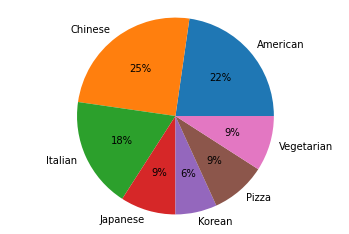

In [40]:
cuisine_labels = ['American','Chinese', 'Italian', 'Japanese', 'Korean', 'Pizza', 'Vegetarian']
 
plt.pie(cuisine_counts,labels= cuisine_labels, autopct='%d%%')
plt.axis('equal')

plt.show()

## Order Price Over Time

5. FoodWheel is a relatively new start-up.  They launched one year ago and have grown more popular since then.  Management suspects that the average amount spent on each order has increased over time. 

    First, load in the `orders.csv` dataset as `orders` and inspect it.
    
    **Hint:**
    
    Start by loading the data from `orders.csv` into the DataFrame called `orders`.

    Examine the first few rows of `orders` using `head()`.

In [20]:
# loading orders.csv into dataframe

orders = pd.read_csv('orders.csv')

In [21]:
# showing first 5 rows of orders dataframe

orders.head()

,id,customer_id,date,price
0,1,61,6-18-2017,13.0
1,2,210,5-8-2017,21.0
2,3,0,9-7-2017,33.0
3,4,66,7-7-2017,19.0
4,5,65,4-26-2017,13.0


6. Perhaps tracking the orders made per month can help us determine a trend. Group the `orders` data by month.

    **Hint:**
    
    Create a new column in `order` called `month` that contains the month that the order was placed.

    The function `split()` will split a string on a character.  For instance, if `mydate` is the string `9-26-2017`, then `mydate.split('-')` would return the list `['9', '26', '2017']`.  `mydate.split('-')[0]` would return `'9'`.

In [37]:
# new month column

orders['month'] = orders.date.apply(lambda x: x.split('-')[0])
orders['month'].head()

0    6
1    5
2    9
3    7
4    4
Name: month, dtype: object

In [43]:
# grouping orders made each month

orders['month'].groupby(orders['month']).count()

month
4    87
5    85
6    92
7    78
8    73
9    85
Name: month, dtype: int64

7. While we are interested in the average order amount spent each month (average price), it wouldn't hurt to include the standard deviation as well. Calculate the average and standard deviation of the amount spent per month (`price`) and store each as its own separate variable.

    **Hint:**
    
    Group `orders` by `month` and get the average order amount in each `month` using `.mean()`. Save your answer to `avg_order`.

    Calculate the standard deviation for each month using `.std()`.  Save this to `std_order`.


In [48]:
avg_order = orders['price'].groupby(orders['month']).mean().reset_index()
avg_order

,month,price
0,4,9.609195
1,5,14.858824
2,6,15.152174
3,7,18.012821
4,8,21.150685
5,9,29.505882


In [49]:
std_order = orders['price'].groupby(orders['month']).std().reset_index()
std_order

,month,price
0,4,2.562504
1,5,3.395210
2,6,2.835934
3,7,2.848985
4,8,4.455556
5,9,4.518806


8. At last, we can now visualize our data. Create a bar plot that demonstrates the trend in average order size over time. Make sure to include the following information:

     -The height of each bar should come from the `price` field from your DataFrame in step 7 (`avg_order`).
     
     -Use the standard deviations from step 7 (`std_order`) as the `yerr`.
     
     -The error capsize should be 5.
     
     -Make sure that you label each bar with the name of the month (i.e., 4 = April).
     
     -Also be sure to label the y-axis.
     
     -Give your plot a descriptive title.
     
     **Hint:** 
   
   The height of the bar plot should be set to `avg_order.price`, and the `yerr` should be set to `std_order.price`.

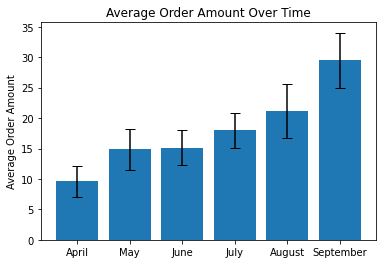

In [57]:
ax = plt.subplot()

plt.bar(range(len(avg_order)),
       avg_order.price,
       yerr=std_order.price,
       capsize=5)
ax.set_xticks(range(len(avg_order)))
ax.set_xticklabels(['April', 'May', 'June', 'July', 'August', 'September'])
plt.ylabel('Average Order Amount')
plt.title('Average Order Amount Over Time')
plt.show()

## Customer Orders

9. There is a range of amounts that customers spend at FoodWheel. Create a `customer_amount` DataFrame that stores each customer and how much they order.

    **Hint:**
    
    Start by grouping `orders` by `customer_id` and calculating the total amount spent by each customer.  Save your results to `customer_amount`.


In [60]:
customer_amount = orders.groupby(orders['customer_id']).sum().reset_index()
customer_amount

,customer_id,id,price
0,0,605,83.0
1,2,302,11.0
2,3,967,65.0
3,4,168,32.0
4,5,2137,119.0
...,...,...,...
219,245,1067,68.0
220,246,481,16.0
221,247,274,35.0
222,248,1229,89.0


10. Create a histogram of the amount spent by each customer over the past six months with the following format:

     -The range should be from 0 to 200
     
     -The number of bins should be 40
     
     -Label the x-axis `Total Spent`
     
     -Label the y-axis `Number of Customers`
     
     -Add a title

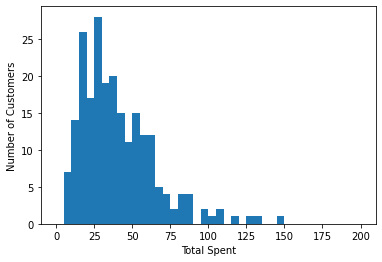

In [62]:
plt.hist(customer_amount['price'].values,
        range=(0, 200), bins=40)
plt.xlabel('Total Spent')
plt.ylabel("Number of Customers")
plt.show()

### Congratulations!! 

The team loves your analysis, and plan to use the information you have gathered to make beneficial decisions for the company and community. There is an additional task of adding the links for each of the paintings to the main list. This task can be considered a challenge that does not need to be completed to move on to the next section.

### Extra Challenge

After a great round of applause, a member of the senior leadership board would quickly like to see the neighborhoods that have the most restaurants. 

Create a visualization to display the restaurant count for each neighborhood.

**Hint:**

View the unique neighborhoods.

Calculate the value counts of the neighborhood variable.

Create a list of the neighborhood count values.

In [65]:
# list of restaurant count for each neighborhood

restaurants['neighborhood'].value_counts().values

array([14, 10,  8,  7,  3,  1,  1])

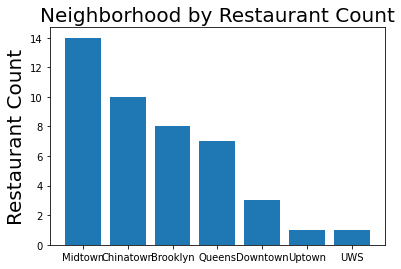

In [66]:
# create bar plot to display restaurant count for each neighborhood

plt.bar(restaurants['neighborhood'].unique(),
        restaurants['neighborhood'].value_counts().values,
       capsize=5)
ax.set_xticks(range(len(restaurants['neighborhood'].unique())))
ax.set_xticklabels(['Downtown', 'Brooklyn', 'Midtown', 'Chinatown', 'Uptown', 'Queens', 'UWS'], fontsize=18)
plt.ylabel('Restaurant Count', fontsize=20)
plt.title('Neighborhood by Restaurant Count', fontsize=20)
plt.show()